## 서울시 구별 CCTV 현황 분석하기

* 서울시 각 구별 CCTV수를 파악하고, 인구대비 CCTV 비율을 파악해서 순위비교
* 인구대비 CCTV의 평균치를 확인하고 그로부터 CCTV가 과하게 부족한 구를 확인

In [2]:
import numpy as np
import pandas as pd

In [3]:
CCTV_Seoul = pd.read_csv('../data/01. CCTV_in_Seoul.csv')
CCTV_Seoul

,기관명,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377
2,강북구,748,369,120,138,204
3,강서구,884,388,258,184,81
4,관악구,1496,846,260,390,613
5,광진구,707,573,78,53,174
6,구로구,1561,1142,173,246,323
7,금천구,1015,674,51,269,354
8,노원구,1265,542,57,451,516
9,도봉구,485,238,159,42,386


In [4]:
CCTV_Seoul.columns

Index(['기관명', '소계', '2013년도 이전', '2014년', '2015년', '2016년'], dtype='object')

In [5]:
CCTV_Seoul.columns[0]

'기관명'

In [6]:
CCTV_Seoul.rename(columns={CCTV_Seoul.columns[0]:'구별'},inplace=True)
CCTV_Seoul.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377
2,강북구,748,369,120,138,204
3,강서구,884,388,258,184,81
4,관악구,1496,846,260,390,613


## 엑셀파일 읽기. 서울시 인구 현황

In [7]:
pop_Seoul = pd.read_excel('../data/01. population_in_Seoul.xls', encoding='utf-8')
pop_Seoul.head()

,기간,자치구,세대,인구,인구.1,인구.2,인구.3,인구.4,인구.5,인구.6,인구.7,인구.8,세대당인구,65세이상고령자
0,기간,자치구,세대,합계,합계,합계,한국인,한국인,한국인,등록외국인,등록외국인,등록외국인,세대당인구,65세이상고령자
1,기간,자치구,세대,계,남자,여자,계,남자,여자,계,남자,여자,세대당인구,65세이상고령자
2,2017.1/4,합계,4202888,10197604,5000005,5197599,9926968,4871560,5055408,270636,128445,142191,2.36,1321458
3,2017.1/4,종로구,72654,162820,79675,83145,153589,75611,77978,9231,4064,5167,2.11,25425
4,2017.1/4,중구,59481,133240,65790,67450,124312,61656,62656,8928,4134,4794,2.09,20764


In [8]:
pop_Seoul = pd.read_excel('../data/01. population_in_Seoul.xls', header = 2, usecols = 'B,D,G,J,N', encoding='utf-8')
pop_Seoul.head()

,자치구,계,계.1,계.2,65세이상고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0


In [9]:
pop_Seoul.rename(
    columns={pop_Seoul.columns[0] :'구별',
             pop_Seoul.columns[1] :'인구수',
             pop_Seoul.columns[2] :'한국인',
             pop_Seoul.columns[3] :'외국인',
             pop_Seoul.columns[4] :'고령자'},
    inplace=True)
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0


In [16]:
CCTV_Seoul.head(5)

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율
0,강남구,2780,1292,430,584,932,1.506192
1,강동구,773,379,99,155,377,1.664908
2,강북구,748,369,120,138,204,1.252033
3,강서구,884,388,258,184,81,1.347938
4,관악구,1496,846,260,390,613,1.492908


In [11]:
CCTV_Seoul.sort_values(by='소계', ascending=True).head(5)

,구별,소계,2013년도 이전,2014년,2015년,2016년
9,도봉구,485,238,159,42,386
12,마포구,574,314,118,169,379
17,송파구,618,529,21,68,463
24,중랑구,660,509,121,177,109
23,중구,671,413,190,72,348


In [12]:
CCTV_Seoul.sort_values(by='소계', ascending=False).head(5)

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
18,양천구,2034,1843,142,30,467
14,서초구,1930,1406,157,336,398
21,은평구,1873,1138,224,278,468
20,용산구,1624,1368,218,112,398


In [14]:
# 컬럼 추가
CCTV_Seoul['최근증가율']=(CCTV_Seoul['2016년'] + CCTV_Seoul['2015년'] + CCTV_Seoul['2014년'])/CCTV_Seoul['2013년도 이전']  
CCTV_Seoul.sort_values(by='최근증가율',ascending=False).head(5)

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율
22,종로구,1002,464,314,211,630,2.489224
9,도봉구,485,238,159,42,386,2.466387
12,마포구,574,314,118,169,379,2.121019
8,노원구,1265,542,57,451,516,1.889299
1,강동구,773,379,99,155,377,1.664908


## 서울시 인구 데이터 파악하기

In [15]:
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0


In [17]:
pop_Seoul.drop([0], inplace=True)
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0
5,광진구,372164.0,357211.0,14953.0,42214.0


In [18]:
pop_Seoul['구별'].unique()

array(['종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구', '강북구',
       '도봉구', '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구', '금천구',
       '영등포구', '동작구', '관악구', '서초구', '강남구', '송파구', '강동구', nan],
      dtype=object)

In [19]:
pop_Seoul[pop_Seoul['구별'].isnull()]

,구별,인구수,한국인,외국인,고령자
26,NaN,NaN,NaN,NaN,NaN


In [20]:
pop_Seoul.drop([26], inplace=True)
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0
5,광진구,372164.0,357211.0,14953.0,42214.0


In [30]:
data_result = pd.merge(CCTV_Seoul, pop_Seoul, on='구별')
data_result.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율,인구수,한국인,외국인,고령자
0,강남구,2780,1292,430,584,932,1.506192,570500.0,565550.0,4950.0,63167.0
1,강동구,773,379,99,155,377,1.664908,453233.0,449019.0,4214.0,54622.0
2,강북구,748,369,120,138,204,1.252033,330192.0,326686.0,3506.0,54813.0
3,강서구,884,388,258,184,81,1.347938,603772.0,597248.0,6524.0,72548.0
4,관악구,1496,846,260,390,613,1.492908,525515.0,507203.0,18312.0,68082.0


In [31]:
data_result['외국인 비율']=(data_result['외국인']/data_result['인구수'])*100
data_result['고령자 비율']=(data_result['고령자']/data_result['인구수'])*100
data_result.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율,인구수,한국인,외국인,고령자,외국인 비율,고령자 비율
0,강남구,2780,1292,430,584,932,1.506192,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
1,강동구,773,379,99,155,377,1.664908,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
2,강북구,748,369,120,138,204,1.252033,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
3,강서구,884,388,258,184,81,1.347938,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
4,관악구,1496,846,260,390,613,1.492908,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


In [32]:
del data_result['2013년도 이전']
del data_result['2014년']
del data_result['2015년']
del data_result['2016년']
data_result.head()

,구별,소계,최근증가율,인구수,한국인,외국인,고령자,외국인 비율,고령자 비율
0,강남구,2780,1.506192,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
1,강동구,773,1.664908,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
2,강북구,748,1.252033,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
3,강서구,884,1.347938,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
4,관악구,1496,1.492908,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


In [33]:
data_result.set_index('구별', inplace=True)
data_result.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인 비율,고령자 비율
구별,,,,,,,,
강남구,2780,1.506192,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
강동구,773,1.664908,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
강북구,748,1.252033,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
강서구,884,1.347938,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
관악구,1496,1.492908,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


## CCTV와 상관계수 계산하기
- 고령자비율, 외국인비율, 인구수 중에서 CCTV와 상관계수의 절대값이 큰 것을 조사
- 상관계수의 절대값이 클수록 관계가 있다.
- 0.1이하 거의 무시
- 0.3이하 약간 상관관계
- 0.7이하 뚜렷한 상관관계

In [39]:
np.corrcoef(data_result['고령자비율'],data_rasult['소계'])

KeyError: '고령자비율'

In [ ]:
np.corrcoef(data_result['외국인비율'],data_result['소계'])

In [ ]:
data_result.sort_values(by='인구수', ascending=False)

## 그래프 그리기 기초 - matplotlib

In [35]:
import matplotlib.pyplot as plt
%matplotlib inline

In [36]:
t = np.arange(0,12,0.01)
y = np.sin(t)

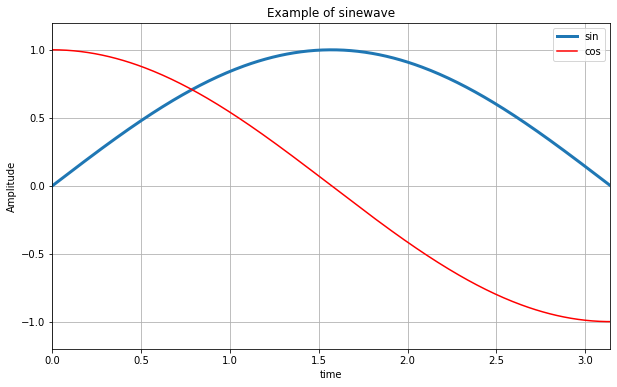

In [41]:
plt.figure(figsize=(10,6))
plt.plot(t, np.sin(t), lw=3, label='sin')
plt.plot(t, np.cos(t), 'r', label='cos')
plt.grid()
plt.legend()
plt.xlabel('time')
plt.ylabel('Amplitude')
plt.title('Example of sinewave')
plt.ylim(-1.2,1.2)
plt.xlim(0,np.pi)
plt.show()

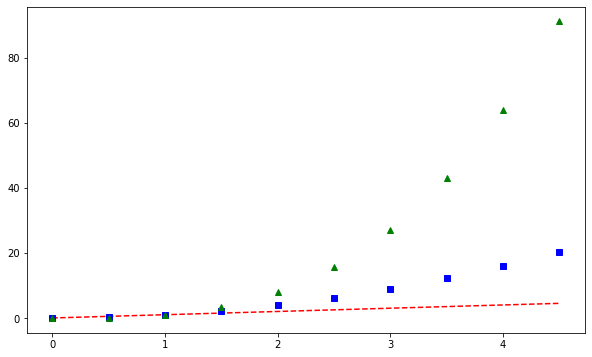

In [47]:
t = np.arange(0,5,0.5)

plt.figure(figsize=(10,6))
plt.plot(t, t, 'r--')
plt.plot(t, t**2,'bs')
plt.plot(t, t**3, 'g^')
plt.show()

## CCTV 그래프그리기

In [50]:
import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

#f_path = '/Library/Fonts/Applegothic.ttf' MAC에서 쓰는거
f_path = "C:/Windows/Fonts/malgun.ttf"
font_name = font_manager.FontProperties(fname=f_path).get_name()
rc('font', family=font_name)

In [49]:
data_rasult.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율,인구수,한국인,외국인,고령자,외국인 비율,고령자 비율
0,강남구,2780,1292,430,584,932,1.506192,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
1,강동구,773,379,99,155,377,1.664908,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
2,강북구,748,369,120,138,204,1.252033,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
3,강서구,884,388,258,184,81,1.347938,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
4,관악구,1496,846,260,390,613,1.492908,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


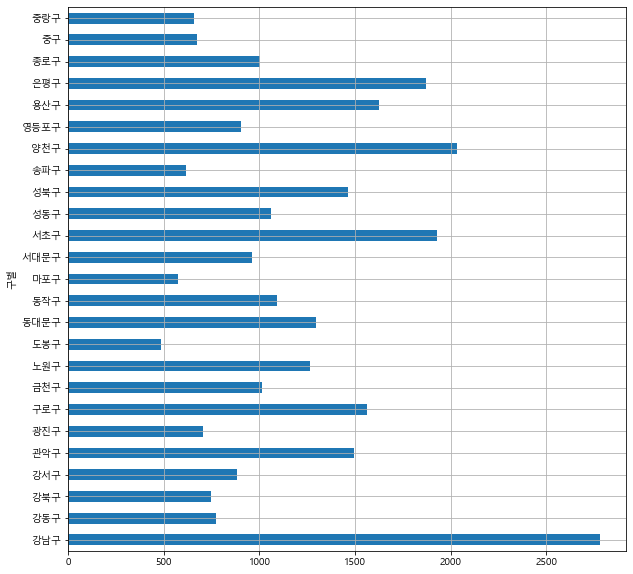

In [51]:
plt.figure()
data_result['소계'].plot(kind='barh', grid=True, figsize=(10,10))
plt.show()

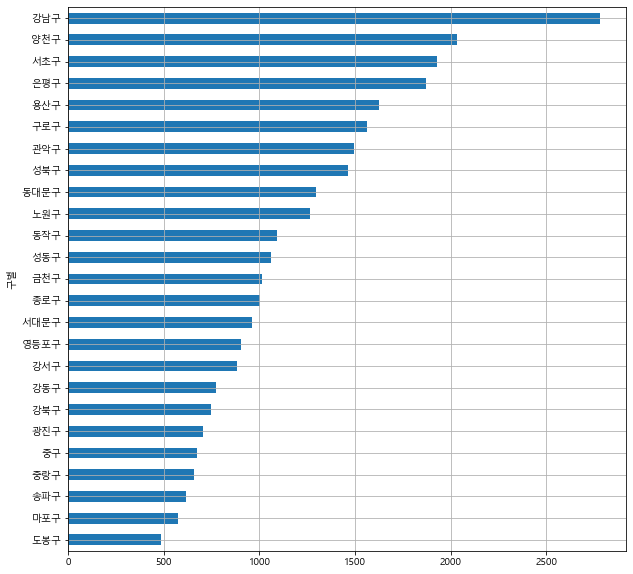

In [53]:
data_result['소계'].sort_values().plot(kind='barh', grid=True, figsize=(10,10))
plt.show()

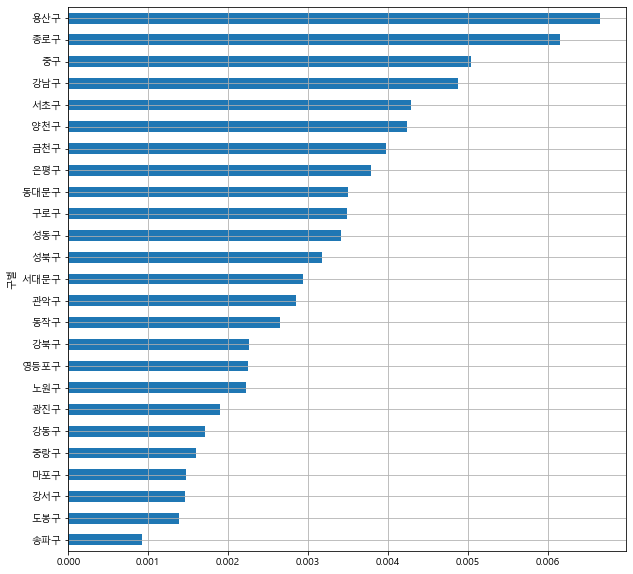

In [54]:
data_result['CCTV 비율']=data_result['소계']/data_result['인구수']
data_result['CCTV 비율'].sort_values().plot(kind='barh',grid=True,figsize=(10,10))
plt.show()

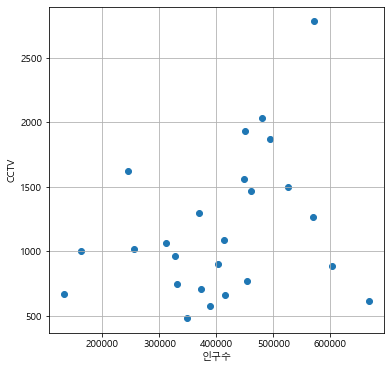

In [55]:
plt.figure(figsize=(6,6))
plt.scatter(data_result['인구수'],data_result['소계'])
plt.xlabel('인구수')
plt.ylabel('CCTV')
plt.grid()
plt.show()

In [56]:
fp1 = np.polyfit(data_result['인구수'],data_result['소계'],1)

f1 = np.poly1d(fp1)
fx = np.linspace(100000,700000,100)

data_result['오차'] = np.abs(data_result['소계']-f1(data_result['인구수']))

df_sort = data_result.sort_values(by='오차', ascending=False)
df_sort.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인 비율,고령자 비율,CCTV 비율,오차
구별,,,,,,,,,,
강남구,2780,1.506192,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217,0.004873,1388.055355
송파구,618,1.043478,667483.0,660584.0,6899.0,72506.0,1.033584,10.862599,0.000926,900.911312
양천구,2034,0.346717,479978.0,475949.0,4029.0,52975.0,0.839413,11.036964,0.004238,760.563512
서초구,1930,0.633713,450310.0,445994.0,4316.0,51733.0,0.958451,11.488308,0.004286,695.403794
용산구,1624,0.532164,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427,0.006650,659.231690


<function matplotlib.pyplot.show(*args, **kw)>

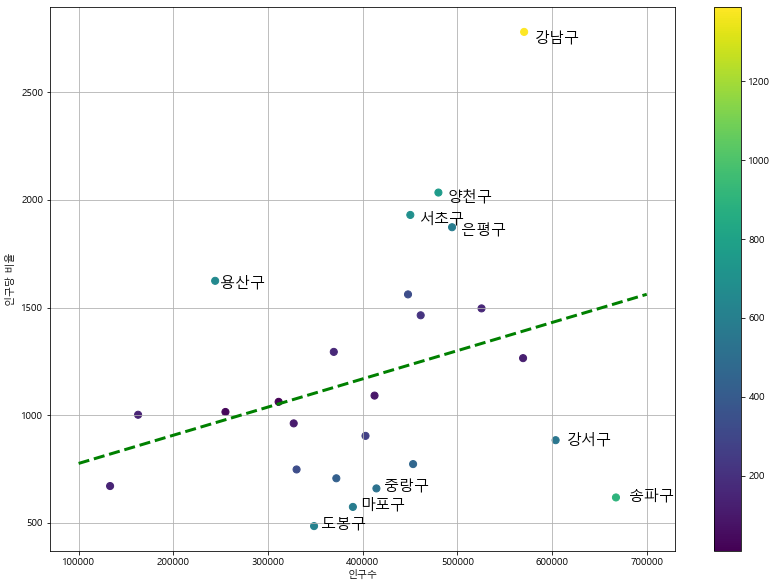

In [57]:
plt.figure(figsize=(14,10))
plt.scatter(data_result['인구수'],data_result['소계'], c=data_result['오차'], s=50)
plt.plot(fx,f1(fx),ls='dashed',lw=3,color='g')

for n in range(10):
    plt.text(df_sort['인구수'][n]*1.02, df_sort['소계'][n]*0.98, df_sort.index[n], fontsize=15)

plt.xlabel('인구수')
plt.ylabel('인구당 비율')

plt.colorbar()
plt.grid()
plt.show